## Descriptive Statistics for Financial Time Series (rare and precious metals)

This notebook contains visualizations of the raw data and mean/variance measures, as well as discussions about stationarity, interpreting the data, and the important features of time series data. 

In [1]:
import quandl
import pandas as pd
import numpy as np
import talib
import csv
import warnings
import seaborn as sns
from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

In [2]:
gold=quandl.get("PERTH/GOLD_USD_D", authtoken="B5RSB-jK5vYvZKyFBm4q")
silver=quandl.get("PERTH/SLVR_USD_D", authtoken="B5RSB-jK5vYvZKyFBm4q")
oil=quandl.get("FRED/DCOILWTICO", authtoken="B5RSB-jK5vYvZKyFBm4q")
ruthenium=quandl.get("JOHNMATT/RUTH", authtoken="B5RSB-jK5vYvZKyFBm4q")
iridium=quandl.get("JOHNMATT/IRID", authtoken="B5RSB-jK5vYvZKyFBm4q")
rhodium=quandl.get("JOHNMATT/RHOD", authtoken="B5RSB-jK5vYvZKyFBm4q")
palladium=quandl.get("JOHNMATT/PALL", authtoken="B5RSB-jK5vYvZKyFBm4q")
platinum=quandl.get("JOHNMATT/PLAT", authtoken="B5RSB-jK5vYvZKyFBm4q")

In [3]:
oil=oil.rename(columns={"Value":'value'})
gold_value=pd.DataFrame((gold['Bid Average']+gold['Ask Average'])/2).rename(columns={0:'value'})
silver_value=pd.DataFrame((silver['Bid Average']+silver['Ask Average'])/2).rename(columns={0:'value_silver'})
ruth_value=pd.DataFrame(ruthenium['New York 9:30']).rename(columns={'New York 9:30':'value_ruth'})
irid_value=pd.DataFrame(iridium['New York 9:30']).rename(columns={'New York 9:30':'value_irid'})
rhod_value=pd.DataFrame(rhodium['New York 9:30']).rename(columns={'New York 9:30':'value_rhod'})
pall_value=pd.DataFrame(palladium['New York 9:30']).rename(columns={'New York 9:30':'value_pall'})
plat_value=pd.DataFrame(platinum['New York 9:30']).rename(columns={'New York 9:30':'value_plat'})
hard=gold_value.join(oil,how='outer',lsuffix='_gold',rsuffix='_oil').join(silver_value,how='outer').join(ruth_value,how='outer').join(irid_value,how='outer').join(pall_value,how='outer').join(rhod_value,how='outer').join(plat_value,how='outer').dropna()

**hard** is a dataframe consisting of all the corresponding daily average prices of our asset classes {Gold, Silver, Ruthenium, Iridium, Rhodium, Palladium, Platinum} with missing values removed. One can see what it looks like below. 

In [4]:
print(hard) 

            value_gold  value_oil  value_silver  value_ruth  value_irid  \
Date                                                                      
1992-07-01     343.400      21.90         4.045        32.0       200.0   
1992-07-02     344.300      22.08         4.050        32.0       200.0   
1992-07-03     346.130      22.08         4.060        32.0       200.0   
1992-07-06     346.250      21.87         4.060        32.0       200.0   
1992-07-07     346.550      21.51         4.060        32.0       200.0   
...                ...        ...           ...         ...         ...   
2020-03-25    1617.155      20.75        14.435       250.0      1510.0   
2020-03-26    1605.405      16.60        14.320       250.0      1510.0   
2020-03-27    1625.080      15.48        14.520       250.0      1510.0   
2020-03-30    1620.540      14.10        14.050       260.0      1510.0   
2020-03-31    1615.885      20.51        14.110       260.0      1520.0   

            value_pall  

# Initial Peek at Data


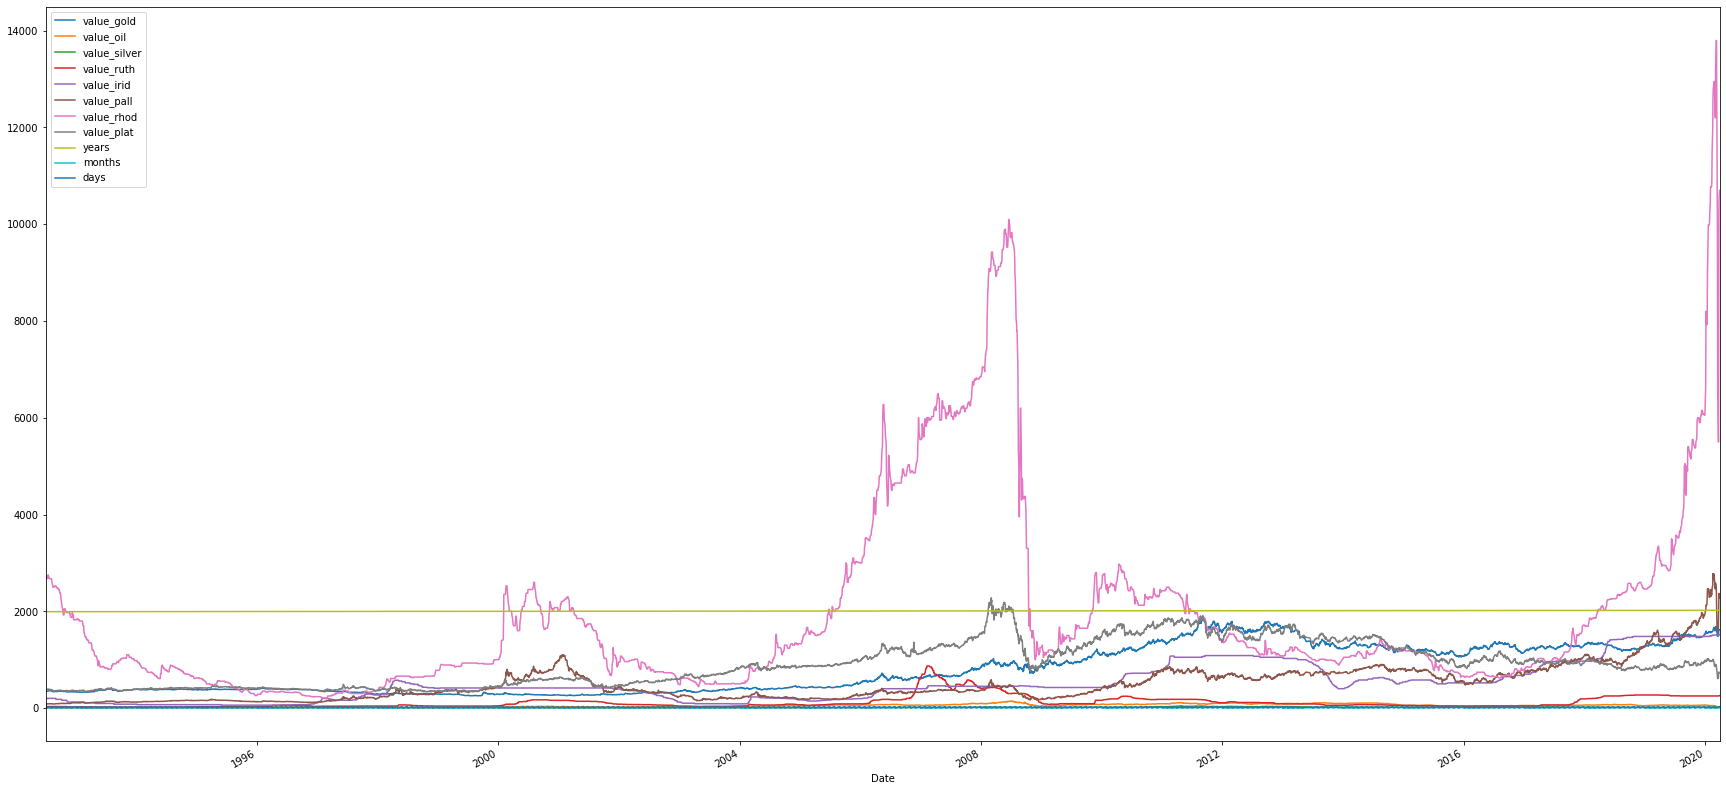

In [26]:
hard.plot(y=list(hard.columns), figsize = (30, 15))
plt.savefig('initial_peek.png')
#print(hard.index)
#initial visualization of prices

### Discussion: Describing Time Series 

For time series data, the **primary statistical property** of significance to us is **stationarity**, i.e. determining how the distribution changes or stays the same over time. Before understanding the overall distribution of our asset prices, we should firstly confirm whether the distribution changes over time. Below we display the rolling averages of all the asset prices. Because the rolling mean follows the trends of the raw prices closely, we can conclude that the distribution is highly variable and largely overlaps with the raw data itself. Therefore, our data is **overall non-stationary** and does not maintain a constant distribution. Hidden Markov Models are, however, primed to describe these kinds of time series regardless. 

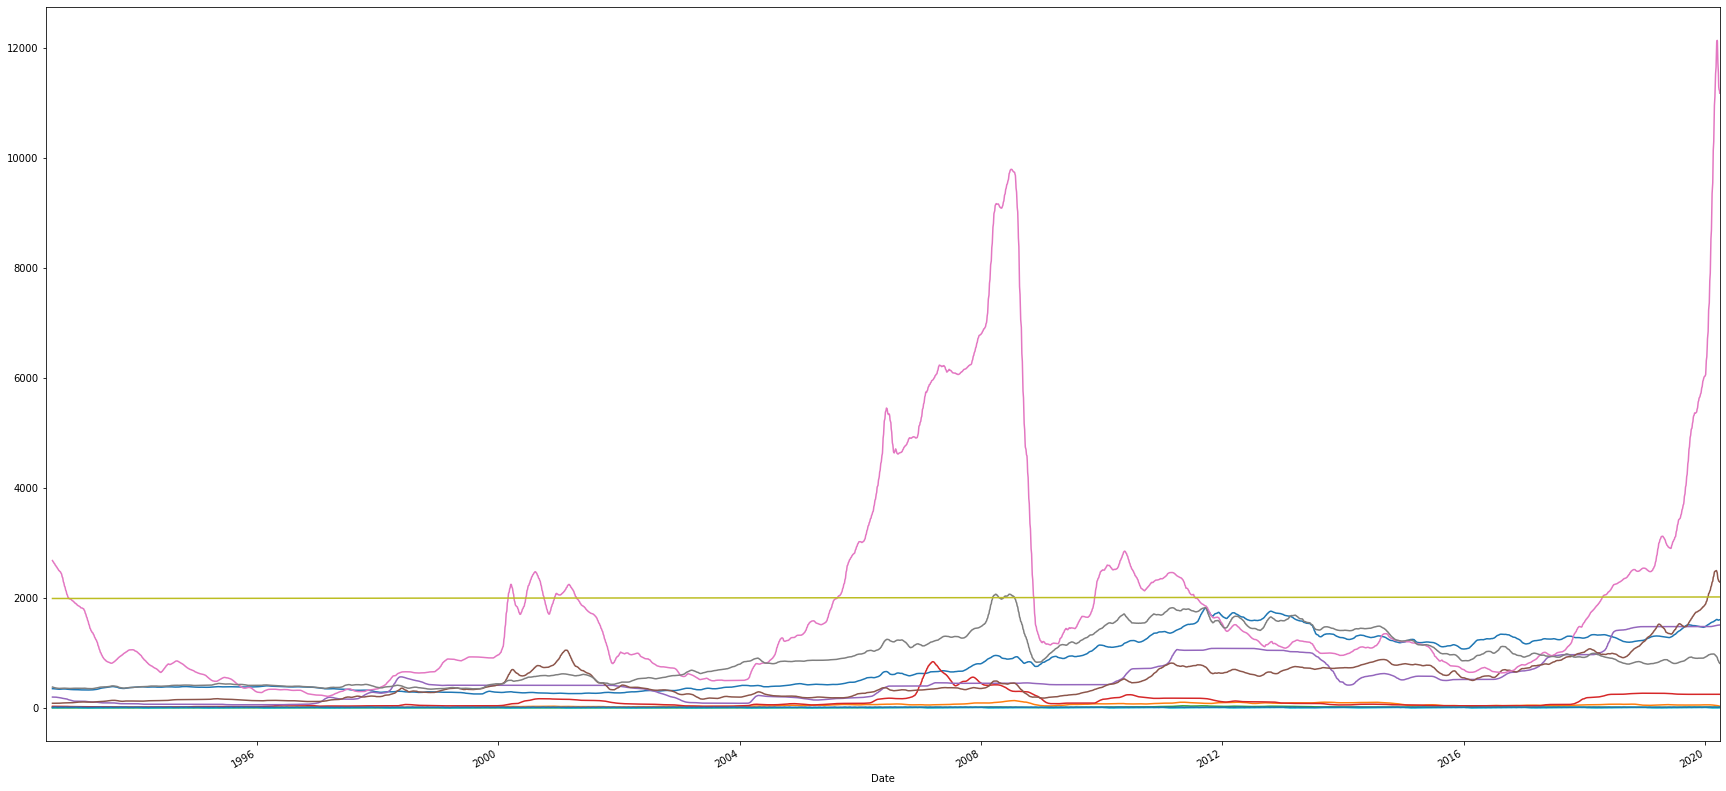

In [27]:
for asset in hard.columns:
    hard[str(asset)].rolling(30).mean().plot(figsize = (30, 15))
    
plt.savefig('rolling_means.png')

Hidden Markov Model learning methods are, however, able to deal handle nonstationary data, using recurrent networks to capture the evolution of temporal data encoded in a high dimensional vector. 

In order to confirm the above assertion about the closeness between the rolling averages (calculated per month ~30 day window) and the actual data, we plot the rolling mean and actual data for every asset class below. 

# Comparison of 30-Day Rolling Mean and Raw Prices

## Gold

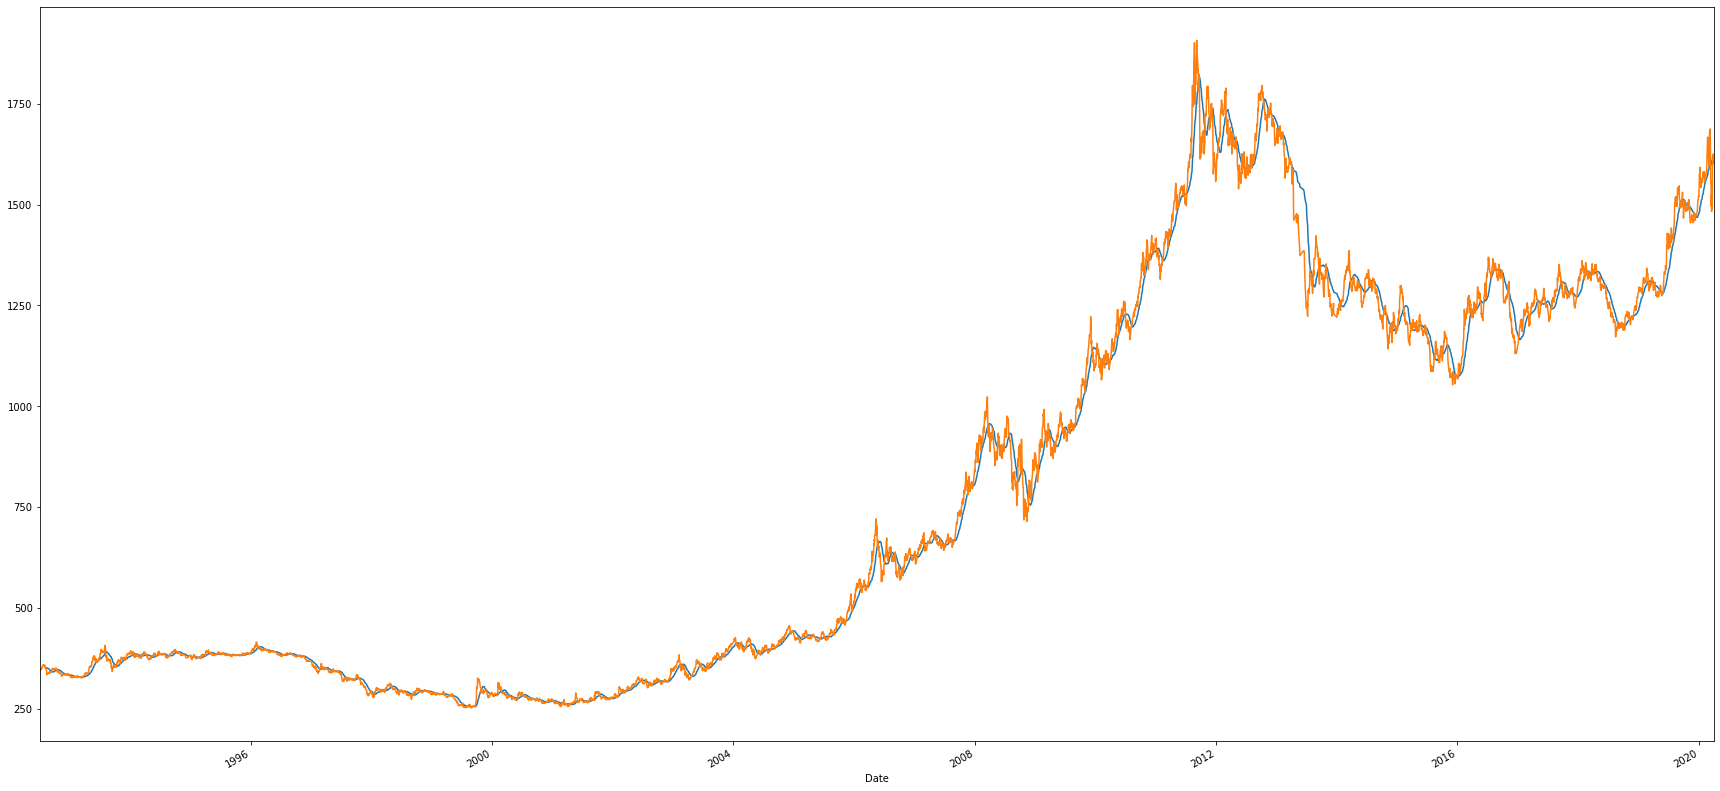

In [28]:
#Gold
hard['value_gold'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_gold'].plot(figsize = (30, 15))

plt.savefig('gold_30day_raw.png')

## Silver

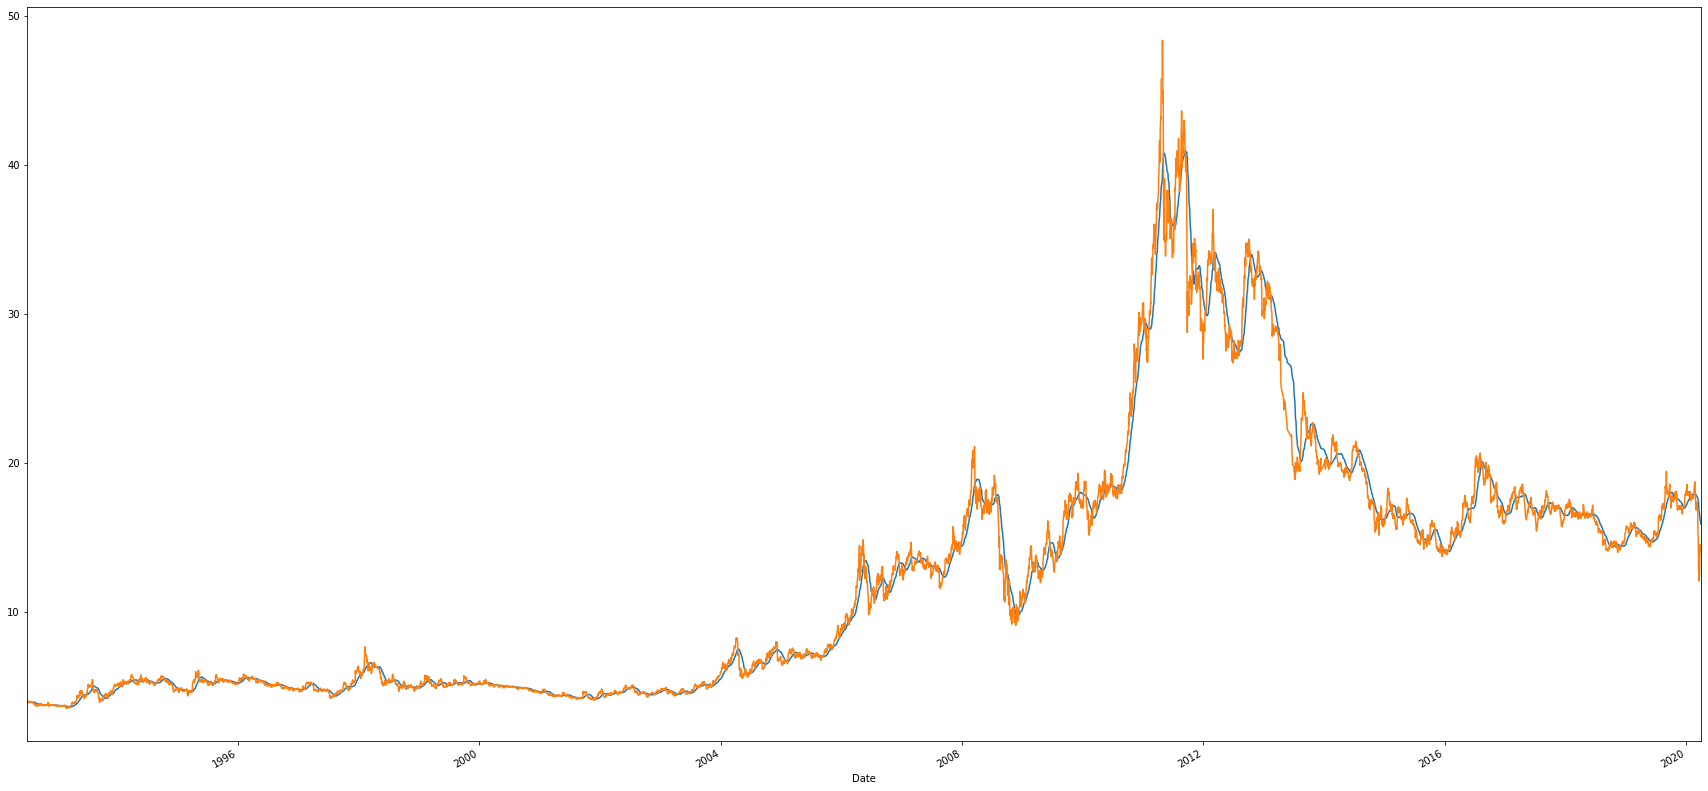

In [29]:
#Silver
hard['value_silver'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_silver'].plot(figsize = (30, 15))
plt.savefig('silver_30day_raw.png')

## Ruthenium

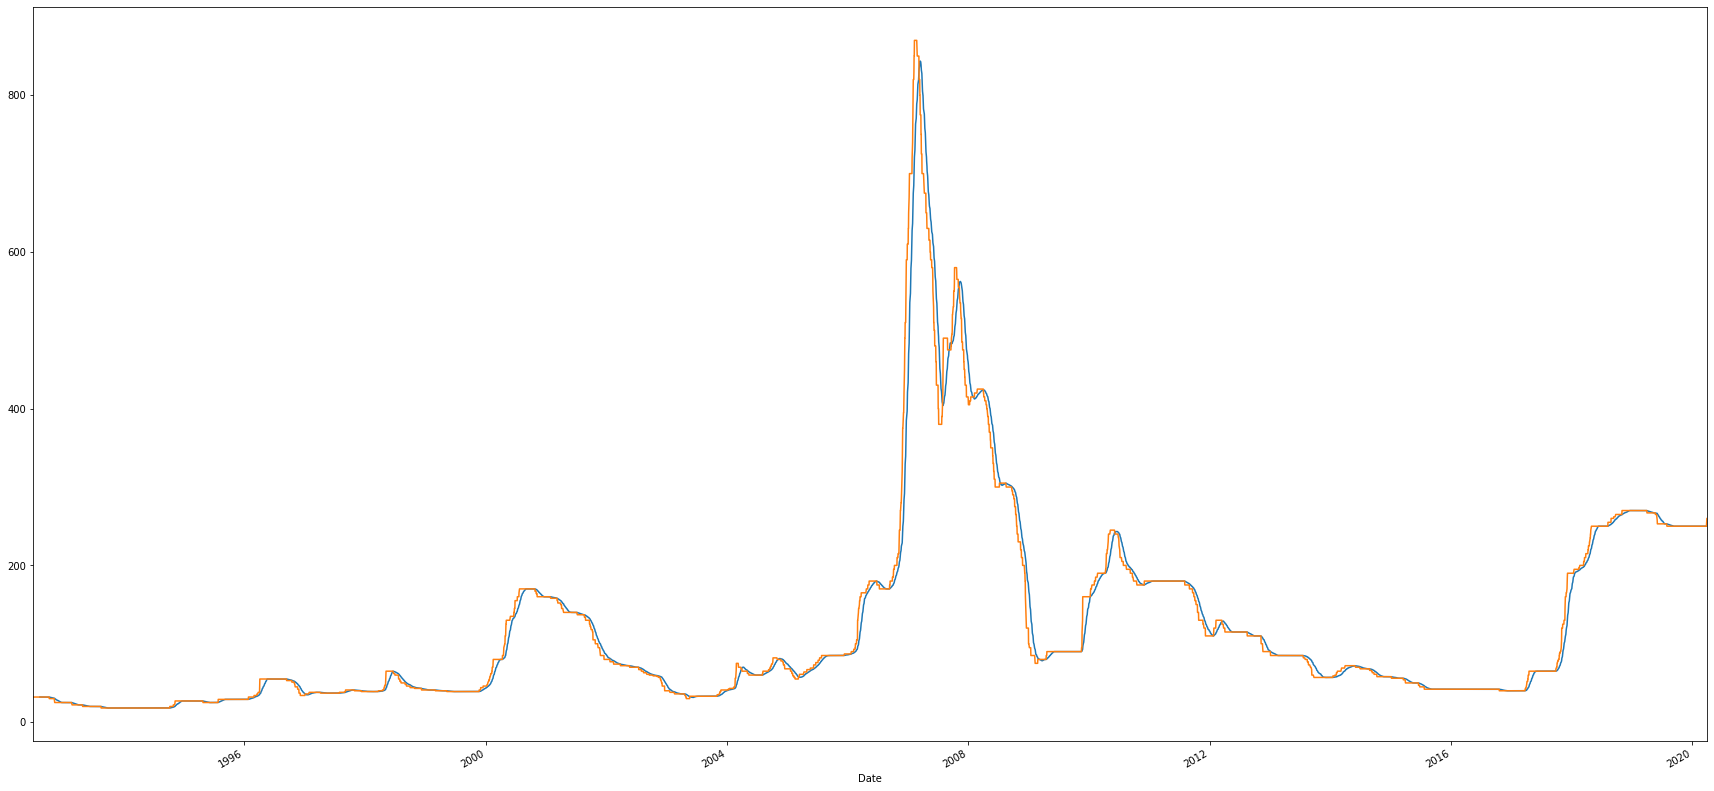

In [30]:
#Ruthenium
hard['value_ruth'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_ruth'].plot(figsize = (30, 15))
plt.savefig('ruth_30day_raw.png')

## Iridium

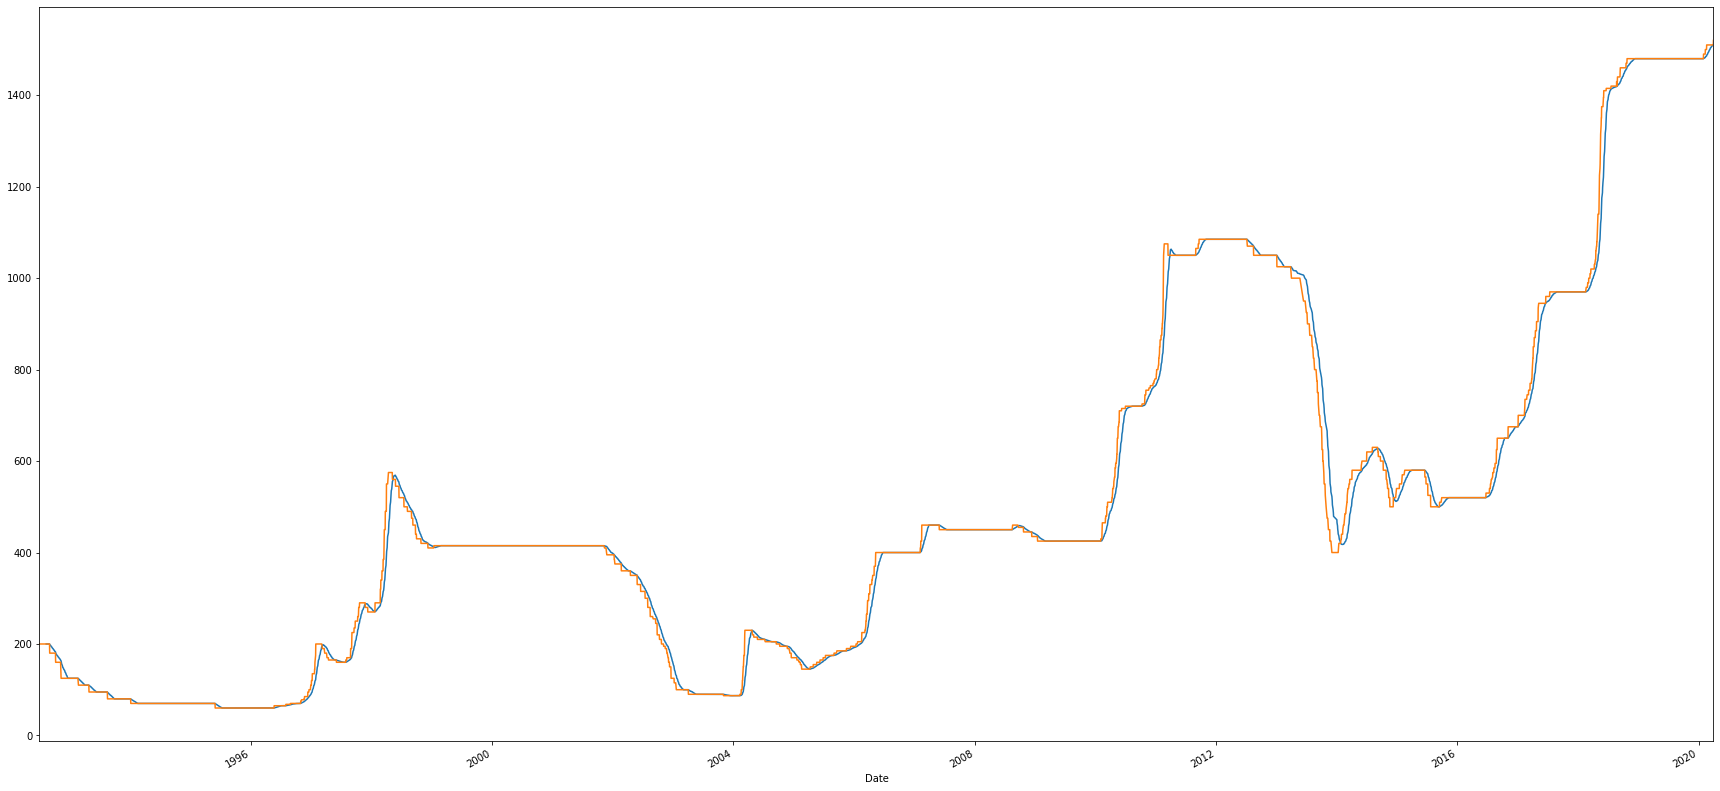

In [31]:
#Iridium
hard['value_irid'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_irid'].plot(figsize = (30, 15))
plt.savefig('irid_30day_raw.png')

## Palladium

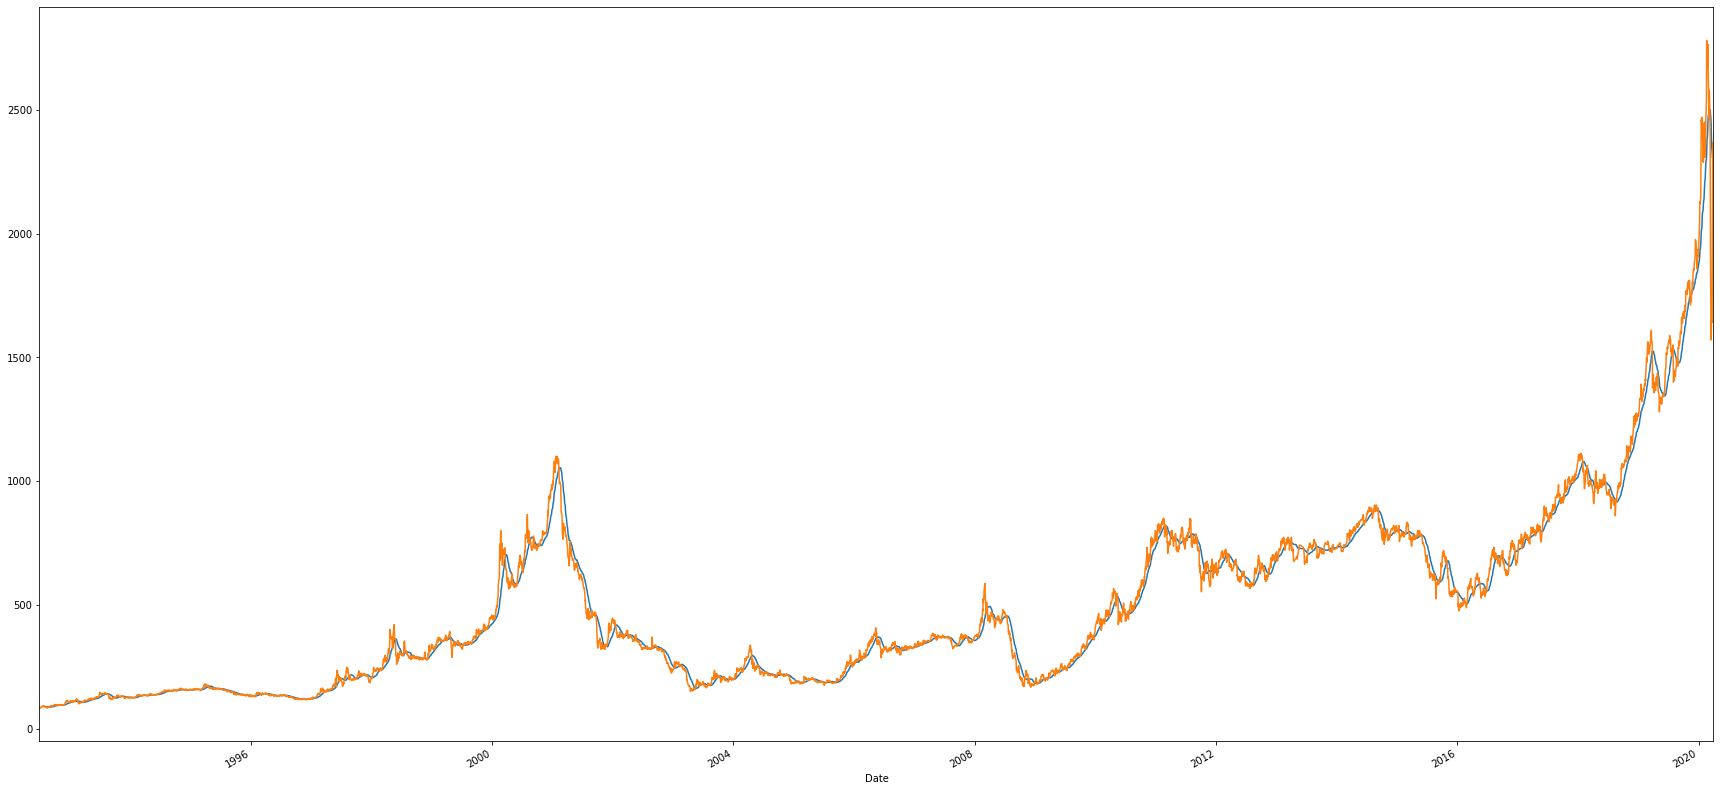

In [32]:
#Palladium
hard['value_pall'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_pall'].plot(figsize = (30, 15))
plt.savefig('pall_30day_raw.png')

## Rhodium

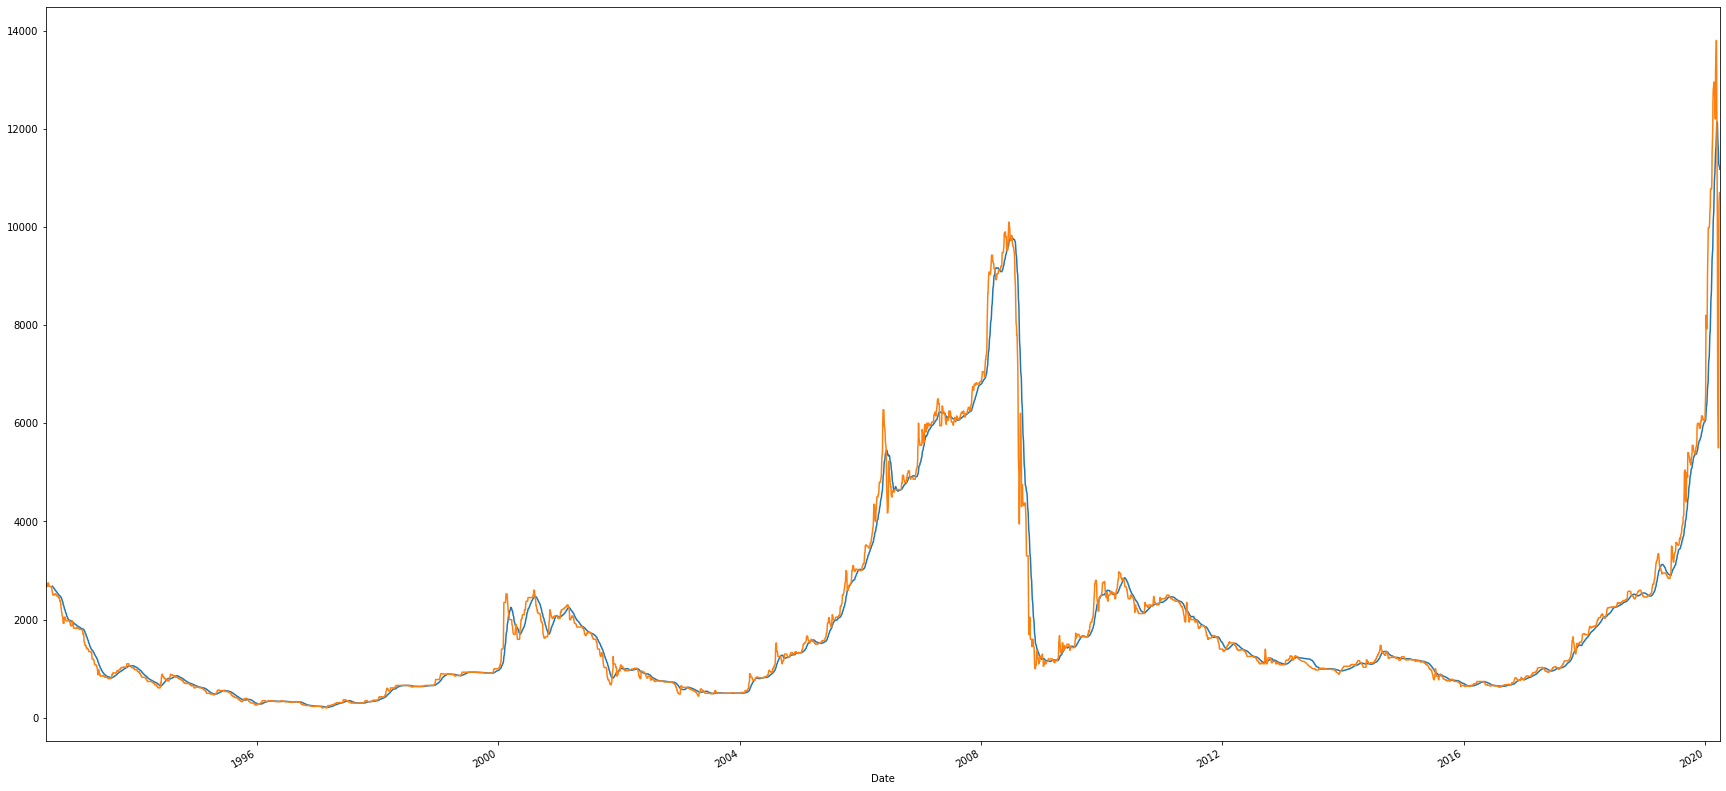

In [33]:
#Rhodium
hard['value_rhod'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_rhod'].plot(figsize = (30, 15))
plt.savefig('rhod_30day_raw.png')

## Platinum

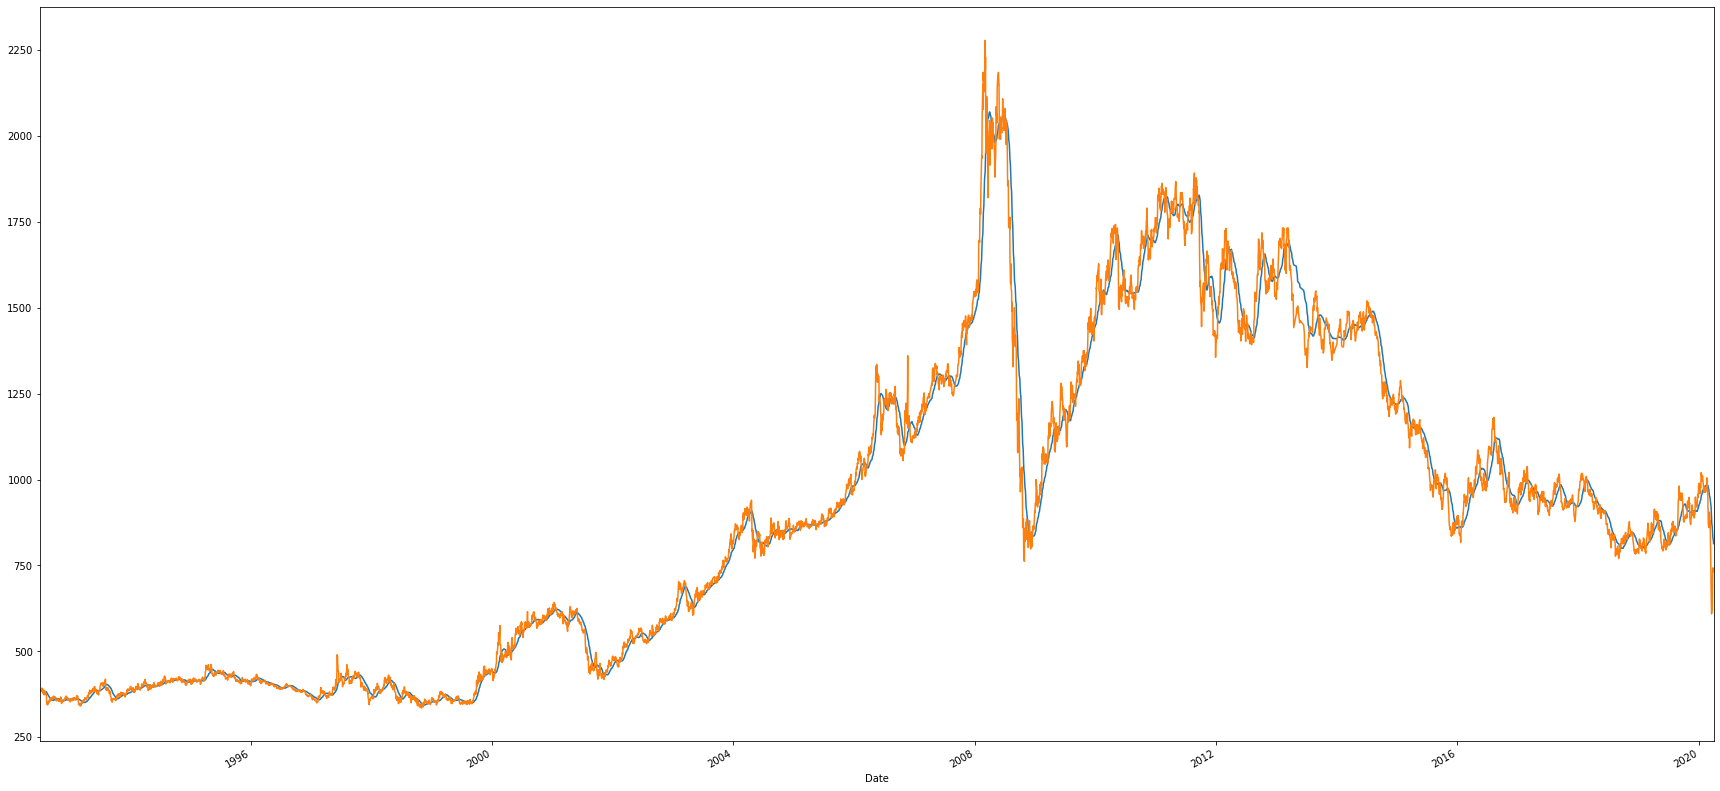

In [34]:
#Platinum
hard['value_plat'].rolling(30).mean().plot(figsize = (30, 15))
hard['value_plat'].plot(figsize = (30, 15))
plt.savefig('plat_30day_raw.png')

### Discussion: Grouping Data by Month

Plotting the above values doesn't tell us much other than that the rolling mean gives us a much smoother curve (averaging out daily fluctuations) to which the actual data largely tends. This is because market data is highly time sensitive and over a period of more than 10 years, market data is extremely variable. Splitting the data apart by year and month may be a good place to obtain more meaningful descriptive statistics. 

There is intuition behind splitting the data apart. In the long-term, it is common knowledge that financial time series are nonstationary, due to ever-changing economies, policies, market sentiments, and a thousand other stochastic factors (human, environmental) that cannot be accounted for. However, month-to-month, it is generally assumed that in the absense of cataclysmic events such as financial crises, pandemics, etc., market conditions are more or less stable. 

# Obtaining Mean and Variance Measures

In [14]:
import datetime
#date_ = datetime.datetime.strptime(a, "%Y-%m-%d")
#date_.year, date_.month, date_.day

#Adding separate columns corresponding to the year, month, and date of the price point
date_strings = [str(a).split(' ')[0] for a in hard.index]
date_list = [datetime.datetime.strptime(a, "%Y-%m-%d") for a in date_strings]
years = [date_.year for date_ in date_list]
months = [date_.month for date_ in date_list]
days = [date_.day for date_ in date_list]
hard['years'] = years
hard['months'] = months
hard['days'] = days

#Ensuring that new columns have been added correctly
#for index, row in hard.iterrows():
    #print(row.index, row['years'], row['months'], row['days'])


In [15]:
hard.groupby(['years', 'months']).mean()
hard.groupby(['years', 'months']).var()

value_gold   value_oil  value_silver  value_ruth  value_irid  \
years months                                                                  
1992  7         31.257511    0.073553      0.002460    0.000000    0.000000   
      8         47.330567    0.040049      0.008191    0.000000    0.000000   
      9         13.388058    0.055584      0.002539    0.000000    0.000000   
      10        17.409920    0.275740      0.000771    0.623377   62.337662   
      11         5.080791    0.053171      0.003609    4.934211  241.776316   
...                   ...         ...           ...         ...         ...   
2019  11       344.757870    0.781454      0.186995    0.000000    0.000000   
      12       315.884035    2.753233      0.196315    0.000000    0.000000   
2020  1        272.730522   12.239594      0.061022    0.000000    5.000000   
      2       1333.009657    4.620032      0.135657    0.000000   76.608187   
      3       4061.930069  116.203199      3.505282    8.658009    4.545455   

                 value_pall    value_rhod    value_plat       days  
years months                                                        
1992  7            7.691700  7.559289e+02     24.059289  89.873518  
      8            3.400000  4.142857e+03    158.014286  74.690476  
      9            3.402597  2.732684e+03     16.279221  83.465368  
      10           1.041126  9.696970e+03     14.164502  82.426407  
      11           1.305263  7.549342e+02     22.050000  72.221053  
...                     ...           ...           ...        ...  
2019  11        1492.146199  7.309518e+04    546.941520  73.245614  
      12        1488.061905  6.817262e+03    551.390476  82.261905  
2020  1        29508.484211  1.875298e+06    376.778947  84.989474  
      2        28436.321637  1.024031e+06    946.479532  70.146199  
      3       139278.259740  7.779464e+06  10510.634199  82.426407  

[333 rows x 9 columns]

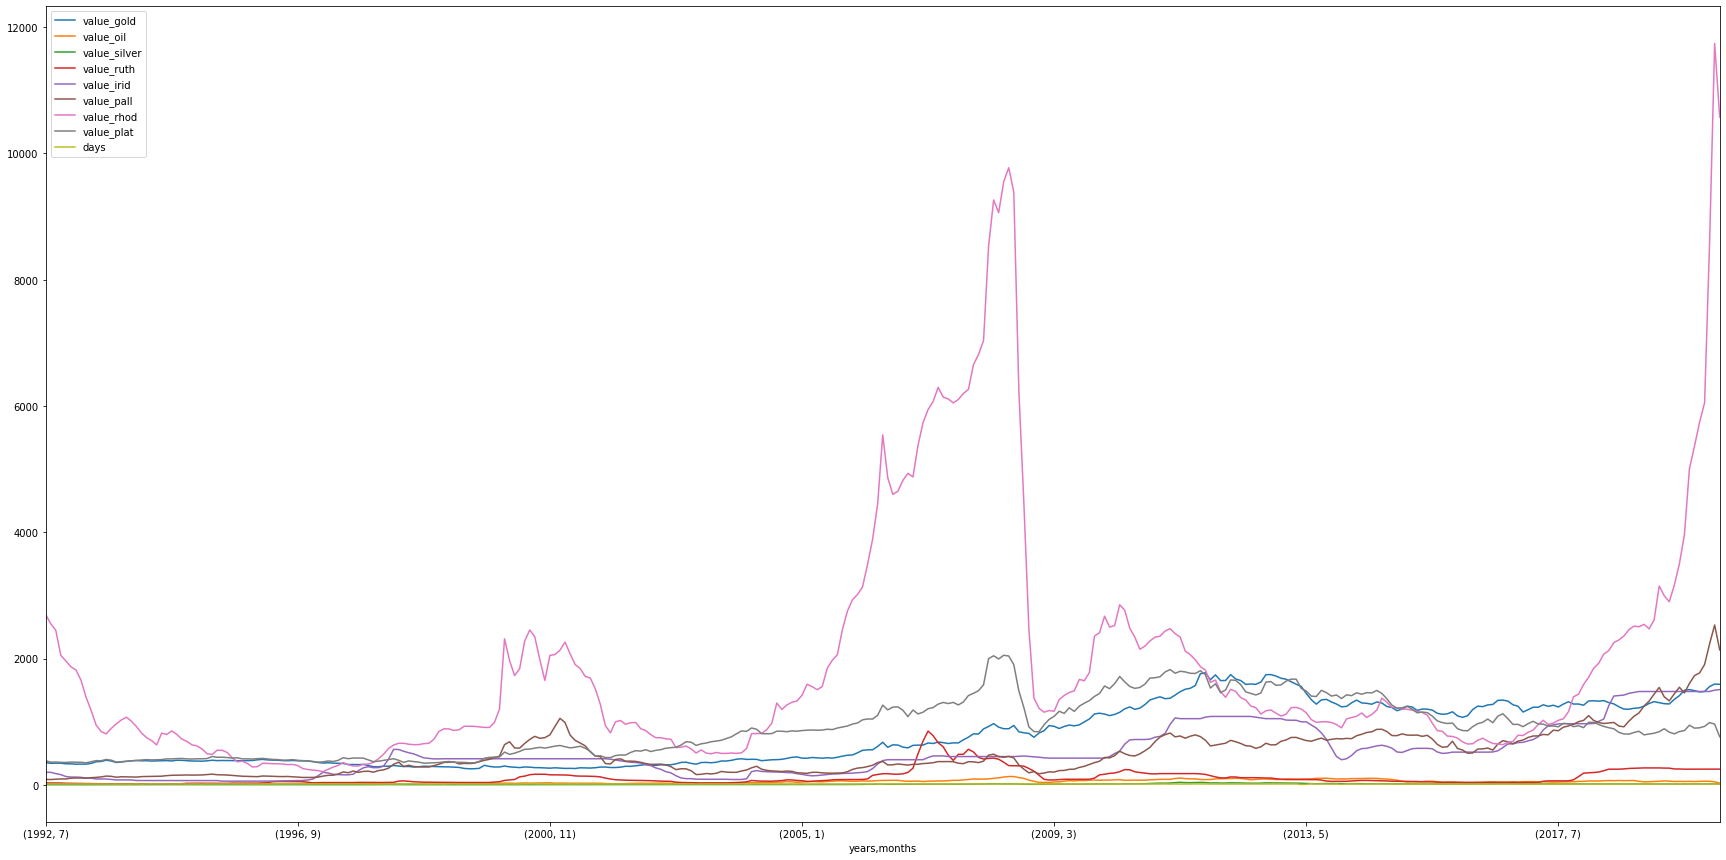

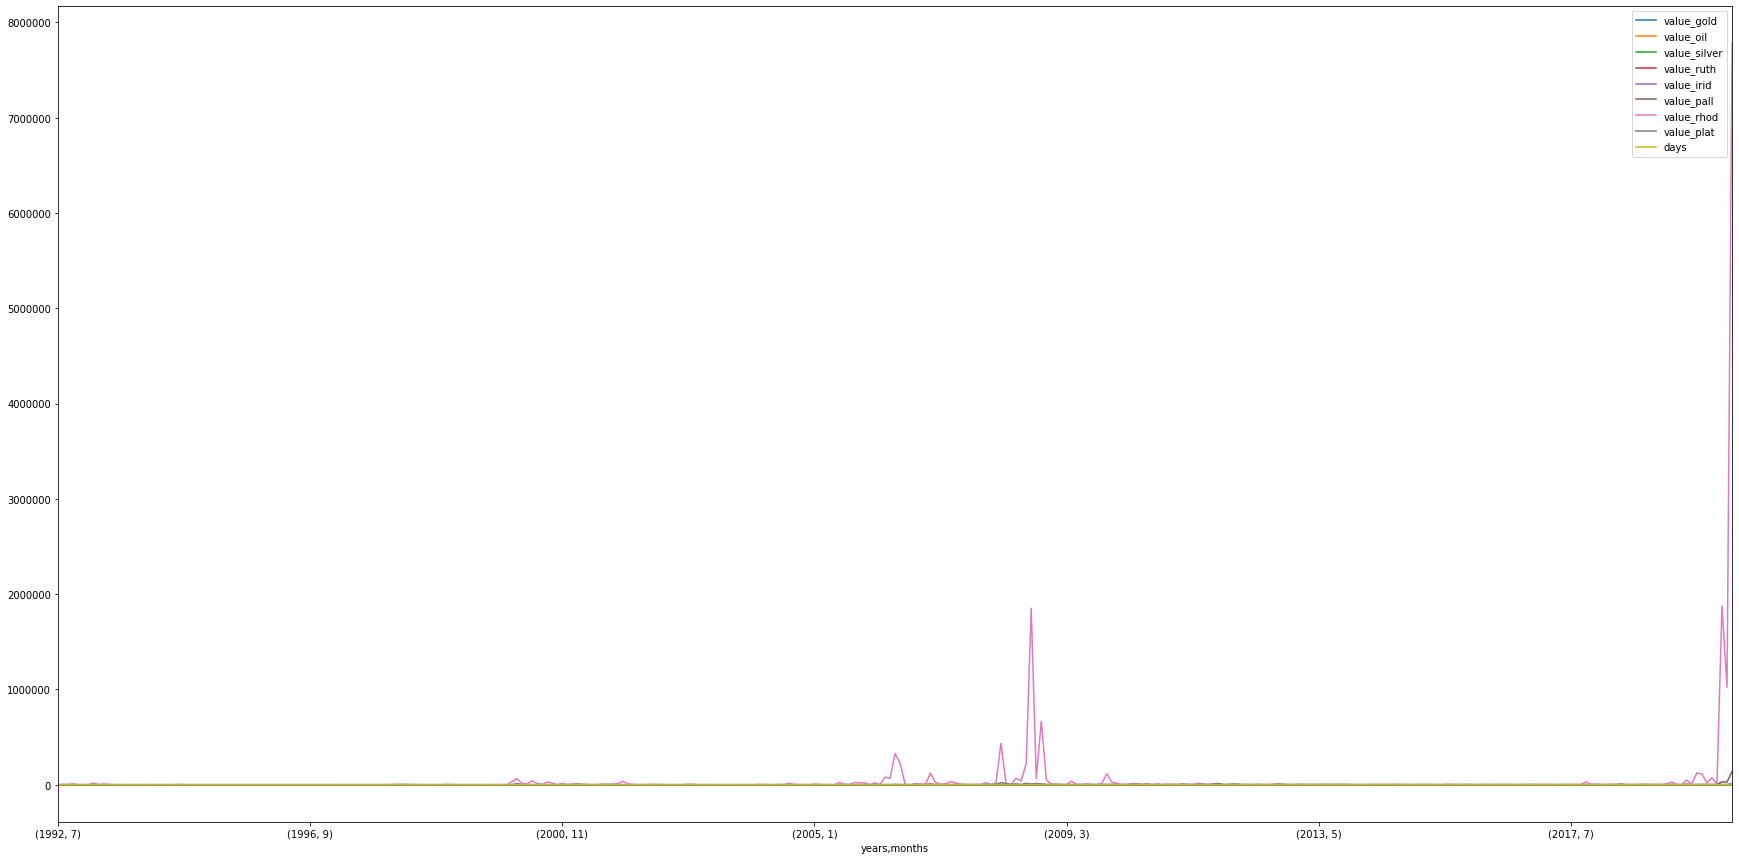

In [35]:
hard.groupby(['years', 'months']).mean().plot(figsize = (30, 15))
hard.groupby(['years', 'months']).var().plot(figsize = (30, 15))
plt.savefig('mean_var.png')

What we have done is isolate monthly mean and variance for the prices of each of our assets, using **groupby** to segregate by year and month hierachically. Let us use the **altair** library to create a line graph with a confidence interval for this data.
 

# Monthly Average Prices and Volatility for all Asset Classes

**INTERPRETING THE ALTAIR LINE GRAPHS**

Each line graph below plots the monthly average price of an asset and displais its volatility as a shaded interval around the line. The volatility each month will be calculated as **lower bound := (line - variance)**, **upper bound := (line + variance)**. The x-axis, labeled **index**, represents the number of months since **July 1992** when our data begins.

In [17]:
#Compiling monthly price averages and volatility into a single dataframe
monthly_data = pd.DataFrame(hard.groupby(['years', 'months']).mean())
monthly_volatility = pd.DataFrame(hard.groupby(['years', 'months']).var())
monthly_data['vol_gold'] = monthly_volatility['value_gold']
monthly_data['vol_oil'] = monthly_volatility['value_oil']
monthly_data['vol_silver'] = monthly_volatility['value_silver']
monthly_data['vol_ruth'] = monthly_volatility['value_ruth']
monthly_data['vol_irid'] = monthly_volatility['value_irid']
monthly_data['vol_pall'] = monthly_volatility['value_pall']
monthly_data['vol_rhod'] = monthly_volatility['value_rhod']
monthly_data['vol_plat'] = monthly_volatility['value_plat']
print(monthly_data.head())

              value_gold  value_oil  value_silver  value_ruth  value_irid  \
years months                                                                
1992  7       352.502609  21.775217      3.976522   32.000000  200.000000   
      8       343.503810  21.339048      3.826905   32.000000  200.000000   
      9       345.481591  21.881364      3.779773   32.000000  180.000000   
      10      344.980227  21.685909      3.759091   30.363636  163.636364   
      11      335.422750  20.338500      3.777500   26.250000  133.750000   

              value_pall   value_rhod  value_plat       days   vol_gold  \
years months                                                              
1992  7        87.652174  2696.739130  383.826087  16.347826  31.257511   
      8        86.000000  2553.571429  360.285714  16.238095  47.330567   
      9        91.545455  2447.727273  362.772727  15.318182  13.388058   
      10       95.227273  2052.272727  358.545455  16.045455  17.409920   
      11  

In [18]:
import altair as alt
import numpy as np

#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_gold']), 'volatility': np.array(monthly_data['vol_gold'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Gold'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


        price  volatility       lower       upper  index
0  352.502609   31.257511  321.245098  383.760120      0
1  343.503810   47.330567  296.173242  390.834377      1
2  345.481591   13.388058  332.093533  358.869649      2
3  344.980227   17.409920  327.570307  362.390147      3
4  335.422750    5.080791  330.341959  340.503541      4


alt.LayerChart(...)

In [19]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_oil']), 'volatility': np.array(monthly_data['vol_oil'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Oil'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


       price  volatility      lower      upper  index
0  21.775217    0.073553  21.701664  21.848771      0
1  21.339048    0.040049  21.298999  21.379097      1
2  21.881364    0.055584  21.825780  21.936947      2
3  21.685909    0.275740  21.410169  21.961649      3
4  20.338500    0.053171  20.285329  20.391671      4


alt.LayerChart(...)

In [20]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_silver']), 'volatility': np.array(monthly_data['vol_silver'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Silver'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


      price  volatility     lower     upper  index
0  3.976522    0.002460  3.974062  3.978982      0
1  3.826905    0.008191  3.818714  3.835096      1
2  3.779773    0.002539  3.777233  3.782312      2
3  3.759091    0.000771  3.758320  3.759861      3
4  3.777500    0.003609  3.773891  3.781109      4


alt.LayerChart(...)

In [21]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_ruth']), 'volatility': np.array(monthly_data['vol_ruth'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Ruthenium'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


       price  volatility      lower      upper  index
0  32.000000    0.000000  32.000000  32.000000      0
1  32.000000    0.000000  32.000000  32.000000      1
2  32.000000    0.000000  32.000000  32.000000      2
3  30.363636    0.623377  29.740260  30.987013      3
4  26.250000    4.934211  21.315789  31.184211      4


alt.LayerChart(...)

In [22]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_irid']), 'volatility': np.array(monthly_data['vol_irid'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Iridium'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


        price  volatility       lower       upper  index
0  200.000000    0.000000  200.000000  200.000000      0
1  200.000000    0.000000  200.000000  200.000000      1
2  180.000000    0.000000  180.000000  180.000000      2
3  163.636364   62.337662  101.298701  225.974026      3
4  133.750000  241.776316 -108.026316  375.526316      4


alt.LayerChart(...)

In [23]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_pall']), 'volatility': np.array(monthly_data['vol_pall'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Palladium'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


       price  volatility      lower      upper  index
0  87.652174    7.691700  79.960474  95.343874      0
1  86.000000    3.400000  82.600000  89.400000      1
2  91.545455    3.402597  88.142857  94.948052      2
3  95.227273    1.041126  94.186147  96.268398      3
4  95.400000    1.305263  94.094737  96.705263      4


alt.LayerChart(...)

In [24]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_rhod']), 'volatility': np.array(monthly_data['vol_rhod'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Rhodium'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


         price   volatility        lower         upper  index
0  2696.739130   755.928854  1940.810277   3452.667984      0
1  2553.571429  4142.857143 -1589.285714   6696.428571      1
2  2447.727273  2732.683983  -284.956710   5180.411255      2
3  2052.272727  9696.969697 -7644.696970  11749.242424      3
4  1963.750000   754.934211  1208.815789   2718.684211      4


alt.LayerChart(...)

In [25]:
#creating a data source to plot
data = pd.DataFrame({'price': np.array(monthly_data['value_plat']), 'volatility': np.array(monthly_data['vol_plat'])})
data['lower'] = data['price'] - data['volatility']
data['upper'] = data['price'] + data['volatility']
data['index'] = data.index
print(data.head())
line = alt.Chart(data).mark_line().encode(
    x='index',
    y='price'
).properties(
    width=900,
    height=750,
    title='(Monthly) Average Price and Volatility of Platinum'
)

band = alt.Chart(data).mark_area(
    opacity=0.5
).encode(
    x='index',
    y='lower:Q',
    y2='upper:Q'
)

band + line


        price  volatility       lower       upper  index
0  383.826087   24.059289  359.766798  407.885375      0
1  360.285714  158.014286  202.271429  518.300000      1
2  362.772727   16.279221  346.493506  379.051948      2
3  358.545455   14.164502  344.380952  372.709957      3
4  356.550000   22.050000  334.500000  378.600000      4


alt.LayerChart(...)

# Interpreting the Data

### Consistent Mean
The assets with consistent averages are ruthenium, iridium, palladium, rhodium, and platinum. Each of these metals is used in niche electronics and technology (i.e. sensors, aviation); therefore, it is no surprise that the events of the past two decades have had little effect on the prices. Their volatilities are also low for the most part. 

### Changing Mean
Gold, silver, and oil have much more erratic means; the mean price of gold appears to experience a general upward drift, while the monthly means of silver and oil are similar in their jagged volatility. The price of gold experiences some control from world governments who may use it to back their currencies; therefore, despite the general upward drift, gold is not as erratic as silver and oil. Silver and oil appear to be far more affected by market conditions than gold; without control from governments, who hold the largest shares of gold, silver and oil are much more vulnerable to changes in market conditions. 

### Volatility Spikes around the 180-Month and 230-Month Marks
From the graphs above, one will notice that several different asset classes display significant increases in volatility around the 180/190-month mark and 230-month mark. These correspond precisely with the 2007 market crash and the 2012 US election. Gold and platinum experience dramatic spikes at both of these times. Silver and iridium only experience spikes at around the 220-month mark, while oil and ruthenium experience spikes at around the 180-month mark. 

# Why HMMs are Suitable for Financial Time Series

The data above reveals that tomorrow's, or next month's prices are a result of today's prices and some stochastic factor in between. This scenario is precisely what a Markov Process attempts to model; a Hidden Markov Model goes further by acknowledging that these stochastic factors cannot be explicitly known, introducing the notion of "hidden states" to encapsulate this idea. 